## Normal Distribution
The normal distribution is described by the mean and the standard deviation.

The normal distribution is often referred to as a 'bell curve' because of it's shape:

-    Most of the values are around the center
-   The median and mean are equal
-    It has only one mode
-    It is symmetric, meaning it decreases the same amount on the left and the right of the center

The area under the curve of the normal distribution represents probabilities for the data.

The area under the whole curve is equal to 1, or 100%

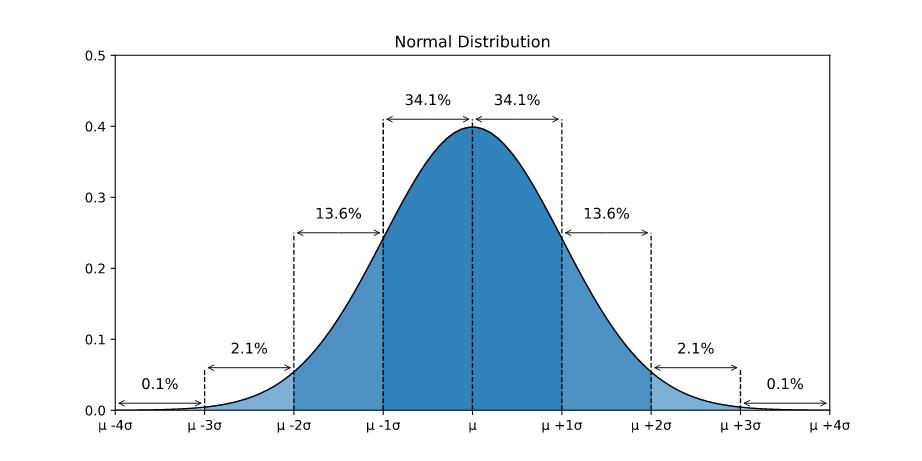

### According to mathmaticians statistics
-    Roughly 68.3% of the data is within 1 standard deviation of the average (from μ-1σ to μ+1σ)
-   Roughly 95.5% of the data is within 2 standard deviations of the average (from μ-2σ to μ+2σ)
-  Roughly 99.7% of the data is within 3 standard deviations of the average (from μ-3σ to μ+3σ)
- And other can be considered as an outlier


### How normal distribution is used in data analysis?
- Well, it is used while data cleaning, removing outlier

In [128]:
# Importing library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
# Creating a dataframe using list of dictionary.
my_list_dict = [{'Name': 'Adam', 'Age': 55, 'gender':'Female'},
                {'Name': 'Bruno', 'Age': 20, 'gender':'male'},
                {'Name': 'Haile', 'Age': 25, 'gender':'male'},
                {'Name': 'Paul', 'Age': 50, 'gender':'Female'},
                {'Name': 'George', 'Age': 60, 'gender':'male'},
                {'Name': 'Rooney', 'Age': 45, 'gender':'male'},
                {'Name': 'Nani', 'Age': 28, 'gender':'Female'},
                {'Name': 'Oscar', 'Age': 20, 'gender':'male'}]
df0 = pd.DataFrame(my_list_dict)
df0

,Name,Age,gender
0,Adam,55,Female
1,Bruno,20,male
2,Haile,25,male
3,Paul,50,Female
4,George,60,male
5,Rooney,45,male
6,Nani,28,Female
7,Oscar,20,male


<Axes: xlabel='Age', ylabel='Count'>

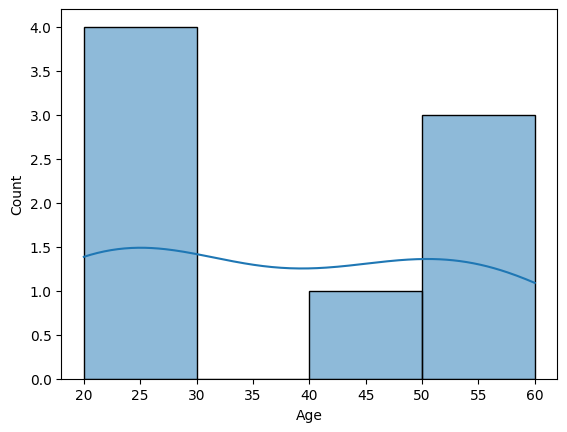

In [130]:
sns.histplot(df0.Age, kde=True)

In [131]:
# Load the dataset

df = pd.read_csv('weight-height.csv')
df.head()


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [132]:
# Shape of the dataset
df.shape

(10000, 3)

In [133]:
# Statistics status
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [134]:
import seaborn as sns

<Axes: xlabel='Height', ylabel='Count'>

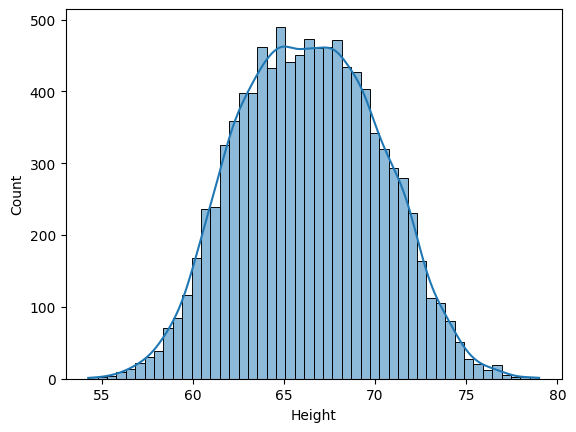

In [135]:
sns.histplot(df.Height, kde= True)

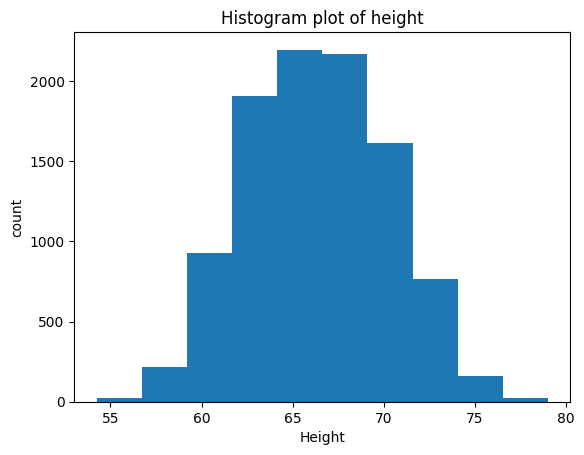

In [136]:
plt.hist(df['Height'])
plt.xlabel('Height')
plt.ylabel('count')
plt.title('Histogram plot of height')
plt.show()

### Lets work on removing the outlier in height column.

In [137]:
mean_height = df.Height.mean()
mean_height

66.36755975482124

In [138]:
std_height = df.Height.std()
std_height

3.8475281207732293

### As we discussed above, if data are not inside (mean - 3*std and mean + 3*std), data can be considered as outlier.


In [139]:
mean_plus = mean_height + 3 * std_height
mean_plus

77.91014411714093

In [140]:
mean_minus = mean_height - 3*std_height
mean_minus

54.82497539250156

In [141]:
# To detct outlier
out = df[(df.Height < mean_minus) | (df.Height > mean_plus)]
out.drop('Weight', axis=1)

,Gender,Height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [166]:
# To remove the outlier we can just reverse above code
# i.e

df_no_outlier = df[(df.Height>54.82497539250156
) & (df.Height<77.91014411714093
)]
df_no_outlier.drop('Weight',axis=1, inplace=True)

/tmp/ipykernel_13064/2034167295.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outlier.drop('Weight',axis=1, inplace=True)


In [167]:
df_no_outlier.shape

(9993, 2)

## Z_SCORE

It is nothing but how many standard deviation away a datapoints is from mean

Formula fro z_score is:

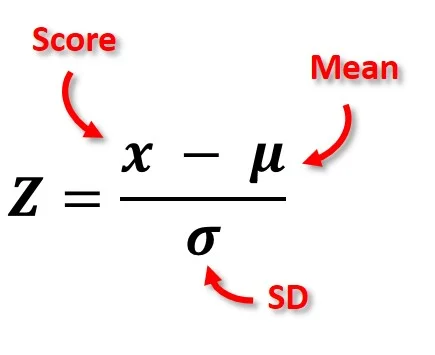


In [168]:
# To find z_score from df_no_outlier column

df_no_outlier['z_score'] = (df_no_outlier['Height']- df_no_outlier.Height.mean())/ df_no_outlier.Height.std()
df_no_outlier.head()

/tmp/ipykernel_13064/1416470184.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outlier['z_score'] = (df_no_outlier['Height']- df_no_outlier.Height.mean())/ df_no_outlier.Height.std()


,Gender,Height,z_score
0,Male,73.847017,1.951021
1,Male,68.781904,0.630437
2,Male,74.110105,2.019613
3,Male,71.730978,1.399324
4,Male,69.881796,0.917202


In [169]:
# Let's find z_score for a single row



row1 = (df_no_outlier.Height[0] - mean_height)/ std_height
row1

1.9439642876971686

### Same result as above table


It is more easy to find outlier using z_score

Let's see how

In [170]:
no_out_with_z_score = df_no_outlier[(df_no_outlier.z_score>3) | (df_no_outlier.z_score<-3)]
no_out_with_z_score


,Gender,Height,z_score


In [164]:
no_out_with_z_score = df_no_outlier[(df_no_outlier.z_score<3) & (df_no_outlier.z_score>-3)]
no_out_with_z_score.head()


,Gender,Height,z_score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [165]:
no_out_with_z_score.shape

(9993, 3)